In [5]:
from acquire import get_connection, new_telco_data, get_telco_data
import pandas as pd
import numpy as np


# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

In [7]:
df = get_telco_data(cached=False)

In [8]:
# Let's check out the first few rows

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [9]:
#Now, let's take a look at the shape

df.shape

(7043, 24)

In [10]:
# I'm curious as to the data types in this set, let's take a look

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

[]

In [33]:
# I see I have a column, total_charges, that has a data
# type currently classified as object. I will want to convert total_charges from an object to a float

df["total_charges"] = pd.to_numeric(df.total_charges, errors='coerce')

In [34]:
# Let's see if there are any columns that have missing values.

nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['total_charges']

In [ ]:
# total_charges is missing has 11 NaN values

In [36]:
# find the people that are NaN in the datasets
# my finding is that they lack a total charges because they are in the first month of usage

df[df.isna().any(axis=1)]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1878,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,NaN,No,Two year,DSL,Credit card (automatic)
1949,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,NaN,No,Two year,DSL,Bank transfer (automatic)
2029,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,NaN,No,Two year,DSL,Mailed check
2048,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,NaN,No,Two year,DSL,Bank transfer (automatic)
2132,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,NaN,No,Two year,DSL,Mailed check
6143,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,NaN,No,One year,None,Mailed check
6569,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,NaN,No,Two year,None,Mailed check
6605,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,NaN,No,Two year,None,Mailed check
6615,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,NaN,No,Two year,None,Mailed check
6686,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,NaN,No,Two year,None,Mailed check


[]

In [14]:
# Let's describe the dataset and get a look at values across our variables with numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [15]:
# Let's explore our column names 
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

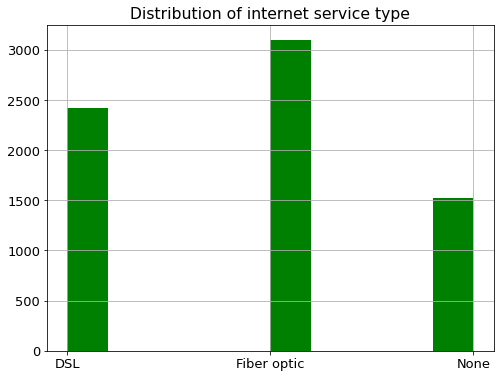

In [18]:
# I'm curious to some of our data distributions, let look at some histogram plots

df['internet_service_type'].hist(color='green')

plt.title('Distribution of internet service type')
plt.show()

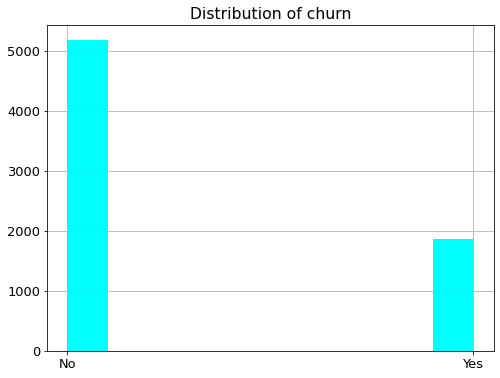

In [19]:
df['churn'].hist(color='cyan')

plt.title('Distribution of churn')
plt.show()

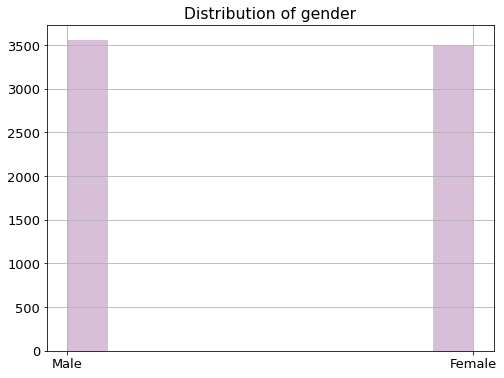

In [20]:
df['gender'].hist(color='thistle')

plt.title('Distribution of gender')
plt.show()

In [29]:
# I'd like to see stats for just the monthly charges column

telco_stats = df[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
